In [3]:
import pandas as pd
import numpy as np
import openpyxl
import os
import glob

e:\Installation\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
e:\Installation\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
coordinates = [
    (23.726258529330963, 90.39760215443611),  # Dhaka Medical College Hospital - G01
    (23.7113636721593, 90.40128288327219),    # SSMCH - G02
    (23.721888178220713, 90.39266678134557),  # Shishu Hospital - G03
    (23.769551979091727, 90.37133208141863),  # SWMH - G04
    (23.739028157774353, 90.39548058141801),  # BSMMU - G05
    (23.73701446380184, 90.41667109720919),   # Police Hospital - G06
    (23.732505152869958, 90.43005601025426),  # Mugda Medical - G07
    (23.727245339635754, 90.37814792559973),  # BGB Hospital - G08
    (23.814783685079878, 90.39889705443794),  # Samorik Hospital - G09
    (23.819453868399307, 90.40935001025609),  # Kurmitola - G10
    (23.87080752284285, 90.40354398142077),   # Kuwait BD - G11
    (23.717493737377456, 90.37719205781974),  # Kamrangir chor - G12
    (23.77433962044181, 90.36838890516535),   # TB Hospital Shyamoli - G13
    (23.776896719367194, 90.40577550722847),  # Songkramok Byadhi - G14
    (23.773760673697247, 90.37031486792793),  # NITOR - G15
    (23.914206815785917, 90.26912412511575),  # Samorik Hospital(Savar) - G16
    (23.728920323677116, 90.40497918921318),  # Sorkari Kormochari - G17
    (23.714229014360615, 90.40500592374467),  # Dhaka Mohanogor General - G18
    (23.719020414582218, 90.39259933127892),  # DSCC Shishu - G19
    (23.77444364645435, 90.4008203525824),     # DNCC Dedicated Covid - G20
    (23.75061422282243, 90.36979913909104),   # Bangladesh MCH - N01
    (23.74689828803771, 90.40314991210928),   # Holy Family Red Crescent - N02
    (23.73960111901086, 90.39632632258575),   # Birdem - N03
    (23.746377694828784, 90.37219606989669),  # Ibn Sina - N04
    (23.753010718774295, 90.3815061525819),   # Square - N05
    (23.749479686986273, 90.38618615258184),  # Comfort Nursing - N06
    (23.752791839084207, 90.38516703909104),  # Shomorita - N07
    (23.788680663544458, 90.35355048141906),  # Delta Medical College - N08
    (23.742417761326248, 90.38302618327282),  # Labaid - N09
    (23.743634617303403, 90.38422172745472),  # Central Hospital - N10
    (23.791677153192687, 90.42501555740265),  # High Care Hospital - N11
    (23.75186326095531, 90.38555483909101),   # Help & Hope - N12
    (23.746713049788433, 90.3858482121093),   # Green Life - N13
    (23.737880855556384, 90.40968359676359),  # Islami Bank Central - N14
    (23.804910313097285, 90.4157728544377),   # United - N15
    (23.749139762830996, 90.42018828141823),  # Khidma - N16
    (23.879007277702033, 90.39287425443928),  # Shahid Monsur Ali - N17
    (23.747478666730757, 90.41037836792734),  # Sirajul Islam - N18
    (23.81052198596412, 90.43135408327426),   # Evercare - N19
    (23.748542644855437, 90.40553422560019),  # Ad-din Medical - N20
    (23.77643377119459, 90.39564021025521),   # Universla Medical - N21
    (23.752496879864417, 90.38559181210941),  # BRB - N22
    (23.707964710615958, 90.42365933909015),  # Ajgor Ali - N23
    (23.77674549765072, 90.36297432560076),   # BD Specialized - N24
    (23.87487552686038, 90.39664535258447),   # Uttara adhunik - N25
    (23.71713013292547, 90.42005909676308),   # Salauddin - N26
    (23.73932596260316, 90.38228915443636),   # Popular medical - N27
    (23.867565305539124, 90.39739452560266),  # Uttara crescent - N28
    (23.745374110927905, 90.3822240256001),   # Anowar khan - N29
    (23.858537751690243, 90.4009591967661),   # Medical college for women - N30
    (23.808288145246028, 90.36113035464749),  # Dr. M R khan - N31
    (23.77401294737494, 90.3614897781836),    # Dhaka central - N32
    (23.881868548272667, 90.40420552560295),  # Aichi hospital - N33
    (23.743368548190734, 90.40773758327285),  # Monowara hospital private - N34
    (23.791591769240803, 90.42020373909189),  # Jainul Haq shikdar - N35
    (23.83842325478293, 90.25290921025649),   # Enam medical - N36
    (23.7845424722981, 90.42595392374616),    # AMZ - N37
    (23.730582390942406, 90.35817111210898),  # Life and care - N38
    (23.754359956865457, 90.37477546792752),  # Farabi general hospital - N39
    (23.73981521973286, 90.3751340679272),    # Japan BD friendship - N40
    (23.798503360359252, 90.37219025443761),  # Exim Bank Hospital - N41
    (23.756062493992758, 90.3632184544367),   # AL Manar - N42
    (23.768703817463756, 90.36873315258221),  # Dhaka Healthcare - N43
    (23.773694847585368, 90.39884821025517),  # Metro politon Medical centre - N44
    (23.703179382639853, 90.38871456792647),  # Sajeda hospital - N45
    (23.674755148548773, 90.43511936978058),  # Bashundhara ad-din - N46
    (23.782345481118913, 90.35258169490973),  # BIHS General - N47
    (23.750002980978078, 90.40928799676384),  # Dhaka community - N48
    (23.74440953311991, 90.37209985443648),   # Northern Intl - N49
    (23.69496946630764, 90.43284613908983),   # Ad-din Barister - N50
    (23.809882502946316, 90.36768588327422),  # Alok hospital - N51
    (23.754193914452284, 90.36543585244601),  # City hospital - N52
    (23.749307846409437, 90.38608801642633),  # Crescent Gastro Liver - N53
    (23.819693093024494, 90.36543081211082),  # Islami Bank - N54
    (23.822525244233656, 90.36532383723781),  # Marks Medical College - N55
    (23.702592931014344, 90.41755619676282),  # Millenium Specialized - N56
    (23.77723674232899, 90.39864510654571),   # ICCDRB - N57
    (23.750459302871562, 90.40239242374547)   # Insaf Barakah - N58
]

coordinates = np.array(coordinates)
print(coordinates)


[[23.72625853 90.39760215]
 [23.71136367 90.40128288]
 [23.72188818 90.39266678]
 [23.76955198 90.37133208]
 [23.73902816 90.39548058]
 [23.73701446 90.4166711 ]
 [23.73250515 90.43005601]
 [23.72724534 90.37814793]
 [23.81478369 90.39889705]
 [23.81945387 90.40935001]
 [23.87080752 90.40354398]
 [23.71749374 90.37719206]
 [23.77433962 90.36838891]
 [23.77689672 90.40577551]
 [23.77376067 90.37031487]
 [23.91420682 90.26912413]
 [23.72892032 90.40497919]
 [23.71422901 90.40500592]
 [23.71902041 90.39259933]
 [23.77444365 90.40082035]
 [23.75061422 90.36979914]
 [23.74689829 90.40314991]
 [23.73960112 90.39632632]
 [23.74637769 90.37219607]
 [23.75301072 90.38150615]
 [23.74947969 90.38618615]
 [23.75279184 90.38516704]
 [23.78868066 90.35355048]
 [23.74241776 90.38302618]
 [23.74363462 90.38422173]
 [23.79167715 90.42501556]
 [23.75186326 90.38555484]
 [23.74671305 90.38584821]
 [23.73788086 90.4096836 ]
 [23.80491031 90.41577285]
 [23.74913976 90.42018828]
 [23.87900728 90.39287425]
 

In [2]:
import os
import openpyxl
text_array = [
    "XvKv wkï nvmcvZvj",
    "knx` ‡mvnivIqv`x© †gwW‡Kj K‡jR nvmcvZvj",
    "weGmGgGgBD",
    "cywjk nvmcvZvj, ivRvievM",
    "gyM`v †gwW‡Kj K‡jR nvmcvZvj",
    "wewRwe nvmcvZvj, wcjLvbv, XvKv",
    "mw¤§wjZ mvgwiK nvmcvZvj",
    "Kzwg©‡Uvjv †Rbv‡ij nvmcvZvj",
    "Kz‡qZ evsjv‡`k ‰gÎx miKvix nvmcvZvj",
    "250 kh¨v wewkó wUwe nvmcvZvj k¨vgjx",
    "31 kh¨v wewkó nvmcvZvj Kvgivw½I Pi",
    "msµvšÍ e¨vwa nvmcvZvj XvKv",
    "wb‡Uvi",
    "mwggwjZ mvgwiK  nvmcvZvj (mvei)",
    "miKvwi Kg©Pvwi  nvmcvZvj",
    "uPvKv gnvbMi †Rbv‡ij nvmcvWvj",
    "uPvKv gnvbMi wkky nvmcvWvj",
    "uwWGwmwm ‡WwW‡K‡UW †KvwfU-19 nvmcvZvj gnvLvjx.XvKv",
    "evsjv‡`k †gwW‡Kj K‡jR nvmcvZvj",
    "nwj d¨vwgwj †iW wµ‡m›U nvmcvZvj",
    "evi‡Wg nvmcvZvj",
    "Be‡b wmbv nvmcvZvj, avbgwÛ",
    "¯‹qvi nvmcvZvj, avbgwÛ",
    "Kg‡dvU© bvwm©s, avbgwÛ",
    "kgwiZv nvmcvZvj, cvš’c_",
    "‡WjUv †gwW‡Kj K‡jR, wgicyi",
    "j¨ve GBW nvmcvZvj",
    "‡m›Uªvj nvmcvZvj, avbgwÛ",
    "nvB †Kqvi nvmcvZvj wjwg‡UW",
    "‡nj&_ GÛ †nvc nvmcvZvj",
    "MÖxb jvBd †gwW‡Kj nvmcvZvj",
    "Bmjvgx e¨vsK ‡m›Uªvj nvmcvZvj, KvKivBj",
    "BDbvB‡UW nvmcvZvj wjwg‡UW",
    "wL`gv nvmcvZvj, wLjMvuI",
    "knx` gbmyi Avjx †gwW‡Kj K‡jR nvmcvZvj",
    "wmivRyj Bmjvg †gwW‡Kj K‡jR nvmcvZvj",
    "G¨‡cv‡jv nvmcvZvj",
    "Av`-w`b †gwW‡Kj K‡jR nvmcvZvj,",
    "BDwbfv‡m©j †gwW‡Kj K‡jR I nvmcvZvj",
    "weAviwe nmwcUvjm wjwg‡UW",
    "AvRMi Avjx nvmcvZvj",
    "evsjv‡`k ‡¯úkvjvBR&W nvmcvZvj",
    "DËiv AvaywbK †gwW‡Kj K‡jR nvmcvZvj",
    "mvjvDwÏb nvmcvZvj",
    "ccyjvi †gwW‡Kj K‡jR nvmcvZvj",
    "DËiv wµ‡m›U nvmcvZvj",
    "Av‡bvqvi Lvb gW©vb †gwW‡Kj K‡jR nvmcvZvj",
    "†gwW‡Kj K‡jR  di Ig‡b nmwcUvj",
    "Wv: Gg Avi Lvb wkk~",
    "XvKv †mUªvj B›Uvi‡bkbvj †gwW‡Kj K‡jR nvmcvZvj",
    "AvBwP nmwcUvjm wjwg‡UW",
    "g‡bvhviv nmwcUvj c«vB‡fU wjwg‡UW",
    "Rhbyj nK wkK`vi †gwW‡Kj K‡jR nvmcvZvj",
    "Gbvg ‡gwW‡Kj K‡jR nvmcvZvj",
    "G Gg ‡RW nvmcvZvj",
    "jvBd GÛ ‡Khvi nvmcvZvj",
    "dvivwe ‡Rbv‡ij nvmcvZvj",
    "Rvcvb evsjv‡`k ‡d«Ûwkc nvmcvZvj",
    "Gw·g e¨vsK nvmcvZvj",
    "Avjgvbvi nvmcvZvj",
    "XvKv ‡nj_ ‡Khvi nvmcvZvj",
    "‡g‡U«vcwjUb ‡gwW‡Kj ‡m›Uvi wjwg‡UW",
    "mv‡R`v nvmcvZvj, ‡KivwbMÄ",
    "Av`-w`b DB‡gbm †gwW‡Kj K‡jR nvmcvZvj",
    "evsjv‡`k Bbw÷wUDU Ad ‡nj_ mvBÝ (we AvB GBP Gm) †Rbv‡ij nvmcvZvj",
    "XvKv KwgDwbwU †gwW‡Kj K‡jR"]

for text in text_array:
    # Set the directory path where subfolders are located
    directory_path = '../../Data/All excels'

    # Set the output file path incrementally in test_dir folder and name it incrementally
    output_file_path = os.path.join('test_dir', 'output'+str(text)+'.xlsx')

    # Open or create the output Excel file
    output_workbook = openpyxl.Workbook()
    output_sheet = output_workbook.active

    # Iterate over each subfolder of each subfolder
    for subfolder in os.listdir(directory_path):
        subfolder_path = os.path.join(directory_path, subfolder)

        # Check if it's a subfolder
        if os.path.isdir(subfolder_path):
            division_file_path = os.path.join(subfolder_path, "Govt-Private.xlsx")

            # Check if "Division.xlsx" exists in the subfolder
            if os.path.isfile(division_file_path):
                # Open the Excel file
                division_workbook = openpyxl.load_workbook(division_file_path)
                division_sheet = division_workbook.active

                # Iterate over rows in the Excel sheet
                for row in division_sheet.iter_rows(min_row=1, values_only=True):
                    # Check if "MvcvjMÄ" is present in any cell
                    if any(text in str(cell) for cell in row):
                        # Add filename in the final column of the row,then Append the row to the output sheet
                        row = row + (subfolder,)
                        output_sheet.append(row)

                # Close the division Excel file
                division_workbook.close()

    # Save the output Excel file
    output_workbook.save(output_file_path)
    output_workbook.close()

    print("Data appended to the output file of " + str(text))


Data appended to the output file of XvKv wkï nvmcvZvj
Data appended to the output file of knx` ‡mvnivIqv`x© †gwW‡Kj K‡jR nvmcvZvj
Data appended to the output file of weGmGgGgBD
Data appended to the output file of cywjk nvmcvZvj, ivRvievM
Data appended to the output file of gyM`v †gwW‡Kj K‡jR nvmcvZvj
Data appended to the output file of wewRwe nvmcvZvj, wcjLvbv, XvKv
Data appended to the output file of mw¤§wjZ mvgwiK nvmcvZvj
Data appended to the output file of Kzwg©‡Uvjv †Rbv‡ij nvmcvZvj
Data appended to the output file of Kz‡qZ evsjv‡`k ‰gÎx miKvix nvmcvZvj
Data appended to the output file of 250 kh¨v wewkó wUwe nvmcvZvj k¨vgjx
Data appended to the output file of 31 kh¨v wewkó nvmcvZvj Kvgivw½I Pi
Data appended to the output file of msµvšÍ e¨vwa nvmcvZvj XvKv
Data appended to the output file of wb‡Uvi
Data appended to the output file of mwggwjZ mvgwiK  nvmcvZvj (mvei)
Data appended to the output file of miKvwi Kg©Pvwi  nvmcvZvj
Data appended to the output file of uPvKv gnvbMi †Rbv‡ij 

In [1]:
import pandas as pd

# Read the Excel file
# file_path = 'test_dir/outputAv‡bvqvi Lvb gW©vb †gwW‡Kj K‡jR nvmcvZvj.xlsx'
import openpyxl

# Load the Excel file
file_path = 'test_dir/outputG¨‡cv‡jv nvmcvZvj.xlsx'
workbook = openpyxl.load_workbook(file_path)

# Create a new workbook to store the results
result_workbook = openpyxl.Workbook()
result_sheet = result_workbook.active

# Iterate through all sheets in the original workbook
for sheet_name in workbook.sheetnames:
    sheet = workbook[sheet_name]

    # Iterate through all cells in the current sheet
    for row in sheet.iter_rows():
        for cell in row:
            # Check if the cell contains the "Dengue" or "dengue" substring
            if "Dengue" in str(cell.value) or "dengue" in str(cell.value):
                # Append the matching cell to the first column of the result sheet
                result_sheet.append([cell.value])

# Save the result workbook
result_workbook.save('test_dir/result.xlsx')


e:\Installation\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
e:\Installation\Anaconda\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
# read the excel file and from first column get the value and trim '_dengue_all' from each cell value
import pandas as pd

# Read the Excel file
file_path = 'test_dir/result.xlsx'
df = pd.read_excel(file_path)

# Trim the "_dengue_all" substring from each cell value in the
df['Date'] = df['Date'].str.replace('_dengue_all', '')

# Save the modified DataFrame to the Excel file result2.xlsx
df.to_excel('test_dir/result2.xlsx', index=False)

C:\Users\aniki\AppData\Local\Temp/ipykernel_34740/1740100417.py:12: UserWarning: Pandas requires version '3.0.3' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  df.to_excel('test_dir/result2.xlsx', index=False)


In [3]:
# trim the 'Dengue_' from the cell value of the first column
file_path = 'test_dir/result2.xlsx'
df = pd.read_excel(file_path)

df['Date'] = df['Date'].str.replace('Dengue_', '')
df.to_excel('test_dir/result2.xlsx', index=False)

C:\Users\aniki\AppData\Local\Temp/ipykernel_34740/3654991489.py:6: UserWarning: Pandas requires version '3.0.3' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  df.to_excel('test_dir/result2.xlsx', index=False)


In [4]:
# convert first column data to datetime format..if cell value is 20230802 then convert it to 2023/08/02

import pandas as pd

# Read the Excel file
file_path = 'test_dir/result2.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)

# Convert the first column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d').dt.strftime('%Y/%m/%d')

# Save the modified DataFrame to the Excel file
df.to_excel('test_dir/result3.xlsx', index=False)

C:\Users\aniki\AppData\Local\Temp/ipykernel_34740/3773104909.py:15: UserWarning: Pandas requires version '3.0.3' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  df.to_excel('test_dir/result3.xlsx', index=False)


In [15]:
import pandas as pd

df = pd.read_excel('../../Data/Processed data/Dhaka central.xlsx')
df.head()
# from "Date" column ..only keep the number part
df['Date'] = df['Date'].str.extract('(\d+)')
df.head()
# convert "Date" column to datetime format 20220901 to 2002/09/01
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].str[:4] + '/' + df['Date'].str[4:6] + '/' + df['Date'].str[6:]
df.head()
#save it in the excel file
df.to_excel('../../Data/Processed data/Dhaka central.xlsx', index=False)

C:\Users\aniki\AppData\Local\Temp/ipykernel_19548/3759082395.py:13: UserWarning: Pandas requires version '3.0.3' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  df.to_excel('../../Data/Processed data/Dhaka central.xlsx', index=False)


In [3]:
import pandas as pd

distance_errors = pd.read_excel('../../Data/test_dir/Distance_lstm.xlsx')
#delete the first row
distance_errors = distance_errors.iloc[1:]
distance_errors.head()

,Hospital,MAE,MSE,RMSE
1,250 shojja bishishto hospital,0.89,2.47,1.57
2,31 shojja bishishto hospital,0.97,3.61,1.90
3,Ad-din medical college hospital,1.90,9.70,3.11
4,Aichi medical college hospital,1.21,3.35,1.83
5,Al manar hospital,1.58,10.81,3.29


In [4]:
solo_errors = pd.read_excel('../../Data/test_dir/solo_lstm.xlsx')
#delete the first row
solo_errors = solo_errors.iloc[1:]
solo_errors.head()

,Hospital,MAE,MSE,RMSE
1,250 shojja bishishto hospital,0.16,0.14,0.37
2,31 shojja bishishto hospital,0.16,0.14,0.37
3,Ad-din medical college hospital,3.00,14.29,3.78
4,Aichi medical college hospital,2.62,9.81,3.13
5,Al manar hospital,0.61,1.20,1.10


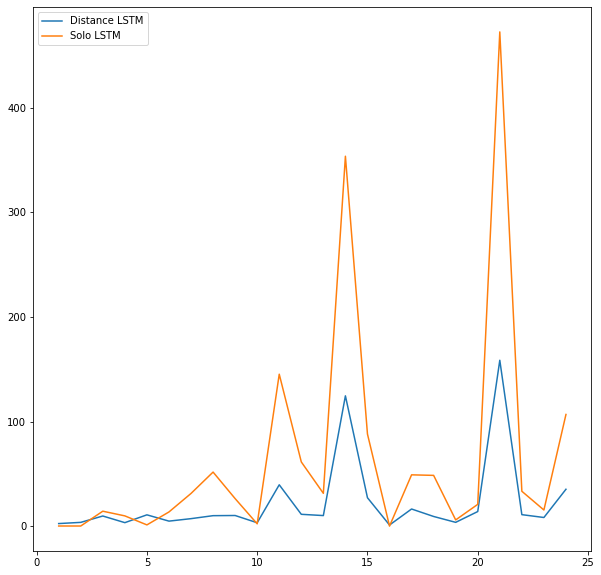

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(distance_errors['MSE'], label='Distance LSTM')
plt.plot(solo_errors['MSE'], label='Solo LSTM')
plt.legend()
plt.show()